### IMDB 데이터셋

In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = \
                      imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
%pprint

Pretty printing has been turned OFF


In [16]:
train_data[0]
print(train_data.shape, type(test_data))

(25000,) <class 'numpy.ndarray'>


In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zaniacs': 52130, '275': 34706, 'consenting': 27631, 'snuggled': 408

In [7]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
review_text = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])
review_text

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        print(i, sequence)
        results[i, sequence] = 1. 
    return results

# 훈련 데이터 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터 변환
x_test = vectorize_sequences(test_data)

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 501

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



23692 [1, 13, 219, 14, 868, 123, 54, 12, 16, 3851, 23, 2, 11, 4728, 13, 16, 574, 11, 719, 1716, 33, 4, 58, 5, 69, 110, 49, 184, 1048, 538, 46, 7, 4, 2, 2, 1850, 21, 988, 9771, 2, 72, 10, 10, 13, 16, 91, 1555, 33, 89, 6, 132, 7, 27, 3587, 240, 179, 3676, 5, 2, 100, 2, 309, 56, 83, 6, 392, 953, 209, 38, 76, 17, 6, 6618, 18, 2, 5, 847, 638, 4, 868, 33, 6, 351, 521, 209, 60, 6, 2, 7, 481, 39, 27, 2194, 48, 29, 2471, 24, 8, 97, 101, 3361, 10, 10, 91, 480, 18, 72, 151, 11, 14, 239, 16, 4, 96, 29, 2313, 8, 27, 2194, 315, 4, 718, 11, 4, 953, 2, 418, 148, 37, 219, 14, 123, 80, 2283, 15, 54, 29, 2, 39, 4, 953, 5, 2, 8, 4, 1873, 19, 27, 648, 8852, 5, 9196, 2, 29, 1906, 309, 56, 34, 4, 350, 7, 27, 419, 17, 48, 34, 6, 3592, 5, 2313, 24, 43, 8, 27, 2194, 21, 8, 6, 368, 4520, 122, 12, 11, 31, 6919, 1573, 2, 1270, 43, 1133, 4, 2124, 1698, 2972, 5, 1152, 141, 6, 201, 7, 3830, 215, 193, 11, 661, 8, 5283, 98, 4, 96, 29, 122, 763, 8, 27, 1748, 2, 27, 565, 5, 867, 3588, 1959, 5, 50, 1838, 6, 2, 284, 4284, 

In [10]:
x_train[0]
len(x_train[0])

10000

In [11]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [12]:
y_train[0]

1.0

### 신경망 모델 만들기

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', 
                input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 훈련 검증

In [15]:
x_eval = x_train[:10000]
y_eval = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

In [16]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_eval, y_eval))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5634 - accuracy: 0.7655 - val_loss: 0.4155 - val_accuracy: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3113 - accuracy: 0.8982 - val_loss: 0.3050 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2095 - accuracy: 0.9330 - val_loss: 0.2836 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1555 - accuracy: 0.9527 - val_loss: 0.2838 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1208 - accuracy: 0.9651 - val_loss: 0.2966 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0927 - accuracy: 0.9768 - val_loss: 0.3163 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0718 - accuracy: 0.9850 - val_loss: 0.3372 - val_accuracy: 0.8815
Epoch 8/20
30

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

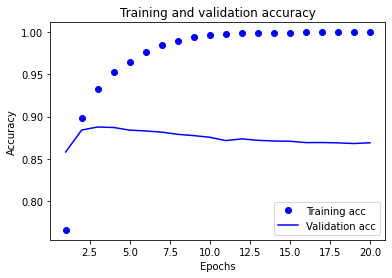

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
model = Sequential()
model.add(Dense(16, activation='relu', 
                input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512);

Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.5202 - accuracy: 0.7858
Epoch 2/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2760 - accuracy: 0.9055
Epoch 3/4
30/30 [==============================] - 1s 27ms/step - loss: 0.1893 - accuracy: 0.9415
Epoch 4/4
30/30 [==============================] - 1s 26ms/step - loss: 0.1412 - accuracy: 0.9581


In [24]:
res = model.evaluate(x_test, y_test)
res

782/782 [==============================] - 2s 2ms/step - loss: 0.2942 - accuracy: 0.8822


[0.29423192143440247, 0.8822399973869324]

In [26]:
model.predict(x_test)

array([[0.20157564],
       [0.9992664 ],
       [0.9500456 ],
       ...,
       [0.0515832 ],
       [0.09035838],
       [0.5353696 ]], dtype=float32)